## Introduction
This notebook explores unsupervised learning via clustering to segment patients based on their medical profiles. Using algorithms like K-Means, Hierarchical Clustering, and DBSCAN, patients were grouped into meaningful clusters representing varying levels of risk and medical resource usage. Techniques like the Elbow Method and Silhouette Score were used to determine the optimal number of clusters. PCA was applied for dimensionality reduction and visual interpretation. These clusters offer healthcare providers insight into patient stratification, enabling personalized care and smarter allocation of resources.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'cleaned_diabetic_data.csv'
data = pd.read_csv(file_path)

# Select relevant features
features = ["age", "A1Cresult", "number_diagnoses", "number_inpatient", "number_emergency"]
data_selected = data[features]

# Handle missing values (replace "Unknown" or NaNs)
data_selected = data_selected.replace("Unknown", None).dropna()

# Encode categorical variables (if any)
data_selected = pd.get_dummies(data_selected, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data_selected["Cluster"] = clusters

# Evaluate the clusters
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Patient Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Analyze cluster characteristics
cluster_analysis = data_selected.groupby("Cluster").mean()
print(cluster_analysis)

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


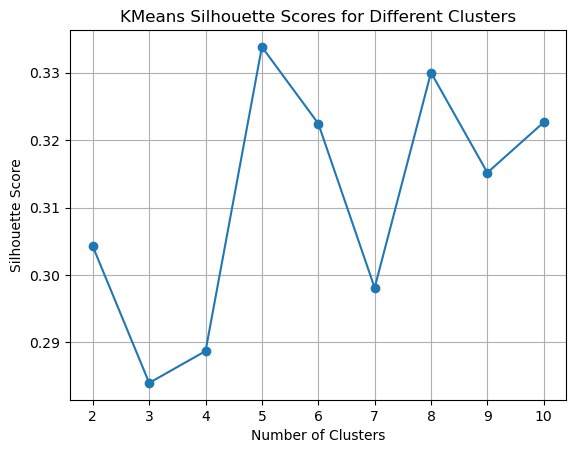

Clustering Results: {'KMeans (Best Silhouette Score)': 0.3338064431109501, 'DBSCAN (Silhouette Score)': 0.17245505470879371, 'Hierarchical (Silhouette Score)': 0.26440736166653334}


In [7]:
# Function to compute silhouette scores for different numbers of clusters (KMeans)
def evaluate_kmeans(data, max_clusters=10):
    silhouette_scores = {}
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores[k] = score
    return silhouette_scores

# Evaluate KMeans for different numbers of clusters
kmeans_silhouette_scores = evaluate_kmeans(data_scaled, max_clusters=10)

# Plot KMeans silhouette scores for different cluster counts
plt.plot(list(kmeans_silhouette_scores.keys()), list(kmeans_silhouette_scores.values()), marker='o')
plt.title("KMeans Silhouette Scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Try DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else None

# Try Hierarchical Clustering (Agglomerative Clustering)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(data_scaled)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_clusters)

# Display results
clustering_results = {
    "KMeans (Best Silhouette Score)": max(kmeans_silhouette_scores.values()),
    "DBSCAN (Silhouette Score)": dbscan_silhouette,
    "Hierarchical (Silhouette Score)": hierarchical_silhouette,
}

print("Clustering Results:", clustering_results)

In [9]:
# Feature selection: focus on clinically meaningful features
selected_features = ["age", "number_diagnoses", "number_inpatient", "number_emergency", "A1Cresult"]
data_selected = data[selected_features]

# Handle missing values
data_selected = data_selected.replace("Unknown", None).dropna()

# Feature transformation (log-transform highly skewed features)
import numpy as np
data_selected["number_inpatient"] = np.log1p(data_selected["number_inpatient"])
data_selected["number_emergency"] = np.log1p(data_selected["number_emergency"])

# Encode categorical variables
data_selected = pd.get_dummies(data_selected, drop_first=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

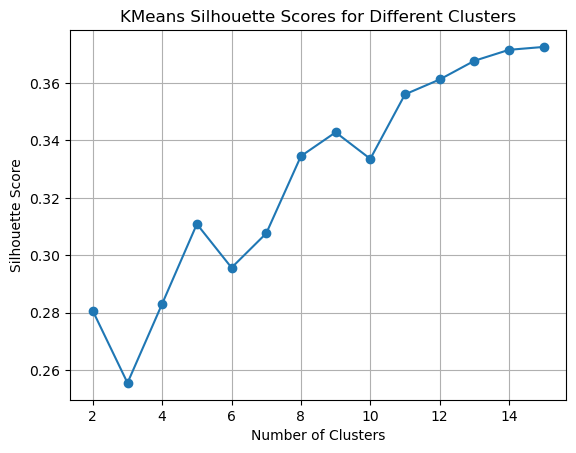

Best number of clusters: 15, Best silhouette score: 0.3725000974259723


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to evaluate silhouette scores for different numbers of clusters
def evaluate_kmeans(data, max_clusters=10):
    silhouette_scores = {}
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores[k] = score
    return silhouette_scores

# Evaluate KMeans for different cluster numbers
kmeans_silhouette_scores = evaluate_kmeans(data_scaled, max_clusters=15)

# Plot silhouette scores
plt.plot(list(kmeans_silhouette_scores.keys()), list(kmeans_silhouette_scores.values()), marker='o')
plt.title("KMeans Silhouette Scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Get the best silhouette score
best_k = max(kmeans_silhouette_scores, key=kmeans_silhouette_scores.get)
print(f"Best number of clusters: {best_k}, Best silhouette score: {kmeans_silhouette_scores[best_k]}")

In [13]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)

# Reapply KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Evaluate silhouette score
silhouette_pca = silhouette_score(data_pca, clusters)
print(f"Silhouette Score after PCA: {silhouette_pca}")

Silhouette Score after PCA: 0.3757710570702998


In [15]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Evaluate silhouette score if clusters are formed
if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form clusters.")

DBSCAN Silhouette Score: 0.17875456902057626


In [17]:
from scipy.stats import zscore

# Remove outliers with Z-score threshold
z_scores = np.abs(zscore(data_scaled))
data_no_outliers = data_scaled[(z_scores < 3).all(axis=1)]

# Reapply KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters_no_outliers = kmeans.fit_predict(data_no_outliers)

# Evaluate silhouette score
silhouette_no_outliers = silhouette_score(data_no_outliers, clusters_no_outliers)
print(f"Silhouette Score after Removing Outliers: {silhouette_no_outliers}")

Silhouette Score after Removing Outliers: 0.3486832491082526


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Define a function for KMeans with Manhattan Distance
def kmeans_manhattan(data, n_clusters, random_state=42):
    # Initialize KMeans with the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, init="k-means++", n_init=10)
    
    # Fit KMeans using the default Euclidean distance to initialize centroids
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    
    # Use Manhattan distance to assign clusters based on the initialized centroids
    distances = pairwise_distances_argmin_min(data, centroids, metric="manhattan")[0]
    return centroids, distances

# Apply KMeans with Manhattan distance
manhattan_centroids, manhattan_clusters = kmeans_manhattan(data_scaled, n_clusters=best_k)

# Evaluate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_manhattan = silhouette_score(data_scaled, manhattan_clusters, metric="manhattan")
print(f"Silhouette Score with Manhattan Distance: {silhouette_manhattan}")

Silhouette Score with Manhattan Distance: 0.3482087062719809


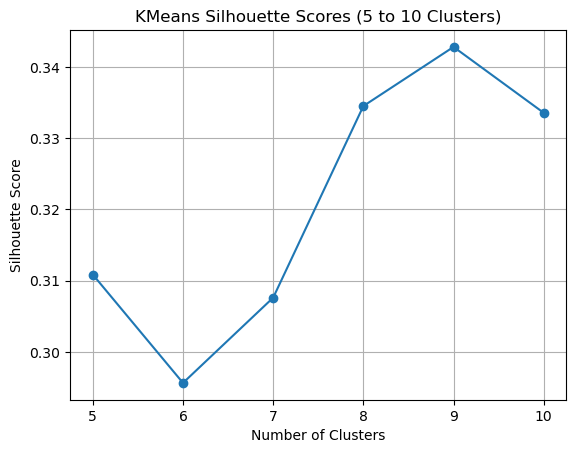

Best number of clusters (5–10): 9, Silhouette Score: 0.3427903863384906


In [23]:
# Function to evaluate KMeans for 5 to 10 clusters
def evaluate_kmeans_range(data, min_clusters=5, max_clusters=10):
    silhouette_scores = {}
    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores[k] = score
    return silhouette_scores

# Evaluate KMeans for 5 to 10 clusters
kmeans_silhouette_scores_5_10 = evaluate_kmeans_range(data_scaled, min_clusters=5, max_clusters=10)

# Plot silhouette scores
plt.plot(list(kmeans_silhouette_scores_5_10.keys()), list(kmeans_silhouette_scores_5_10.values()), marker='o')
plt.title("KMeans Silhouette Scores (5 to 10 Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Print the best number of clusters and silhouette score
best_k_5_10 = max(kmeans_silhouette_scores_5_10, key=kmeans_silhouette_scores_5_10.get)
print(f"Best number of clusters (5–10): {best_k_5_10}, Silhouette Score: {kmeans_silhouette_scores_5_10[best_k_5_10]}")

In [25]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with default parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Evaluate silhouette score if clusters are formed
if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form meaningful clusters with the current parameters.")

DBSCAN Silhouette Score: 0.17875456902057626


In [27]:
from sklearn.mixture import GaussianMixture

# Apply GMM with the best cluster count from KMeans
gmm = GaussianMixture(n_components=best_k_5_10, random_state=42)
gmm_clusters = gmm.fit_predict(data_scaled)

# Evaluate silhouette score
gmm_silhouette = silhouette_score(data_scaled, gmm_clusters)
print(f"Gaussian Mixture Model Silhouette Score: {gmm_silhouette}")

Gaussian Mixture Model Silhouette Score: 0.29942565776517377


In [31]:
# Add cluster labels to the dataset
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_selected["Cluster"] = clusters

# Analyze cluster characteristics
cluster_analysis = data_selected.groupby("Cluster").mean()
cluster_analysis

,age,number_diagnoses,number_inpatient,number_emergency,A1Cresult_>8,A1Cresult_Norm
Cluster,,,,,,
0,61.119942,8.109104,0.966338,0.000000,0.997110,0.000000
1,65.764012,7.578466,0.000000,0.000000,0.000000,1.000000
2,62.269373,8.537515,0.000000,0.000000,1.000000,0.000000
3,56.343284,8.173364,0.715859,0.985791,0.927669,0.003444
4,68.811849,7.796224,0.105597,0.000000,0.000000,0.000000
5,61.207254,4.863731,0.047109,0.010415,0.961140,0.000000
6,25.861595,3.568286,0.108385,0.027164,0.844180,0.072411
7,66.718266,8.035604,0.987872,0.011266,0.000000,0.784830
8,64.456522,8.281250,0.425666,0.858989,0.000000,0.684783


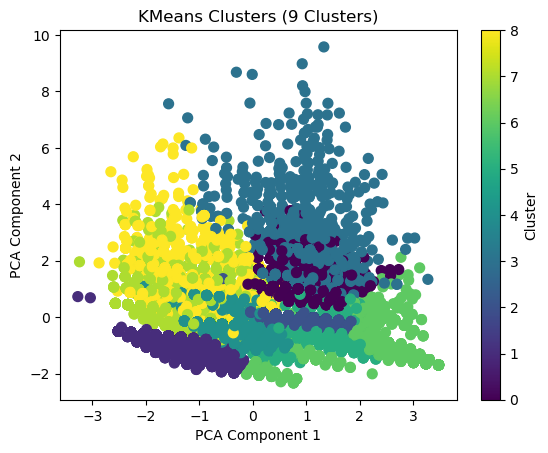

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("KMeans Clusters (9 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [37]:
# Analyze cluster characteristics
cluster_analysis = data_selected.groupby("Cluster").mean()
cluster_analysis

,age,number_diagnoses,number_inpatient,number_emergency,A1Cresult_>8,A1Cresult_Norm
Cluster,,,,,,
0,61.119942,8.109104,0.966338,0.000000,0.997110,0.000000
1,65.764012,7.578466,0.000000,0.000000,0.000000,1.000000
2,62.269373,8.537515,0.000000,0.000000,1.000000,0.000000
3,56.343284,8.173364,0.715859,0.985791,0.927669,0.003444
4,68.811849,7.796224,0.105597,0.000000,0.000000,0.000000
5,61.207254,4.863731,0.047109,0.010415,0.961140,0.000000
6,25.861595,3.568286,0.108385,0.027164,0.844180,0.072411
7,66.718266,8.035604,0.987872,0.011266,0.000000,0.784830
8,64.456522,8.281250,0.425666,0.858989,0.000000,0.684783


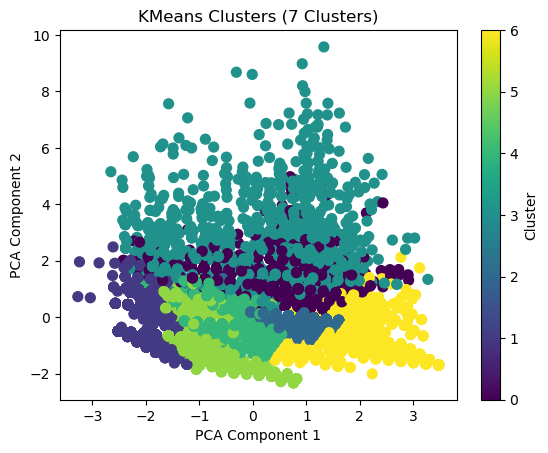

In [39]:
# Try KMeans with fewer clusters (e.g., 5 or 7)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters_7 = kmeans.fit_predict(data_scaled)

# Visualize with 7 clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_7, cmap='viridis', s=50)
plt.title("KMeans Clusters (7 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

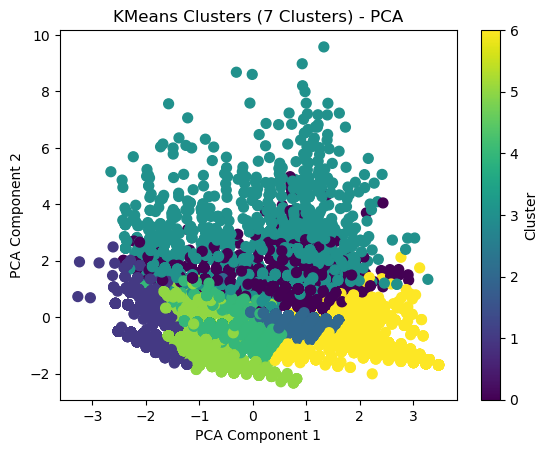

In [41]:
# PCA visualization for 7 clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_7, cmap='viridis', s=50)
plt.title("KMeans Clusters (7 Clusters) - PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

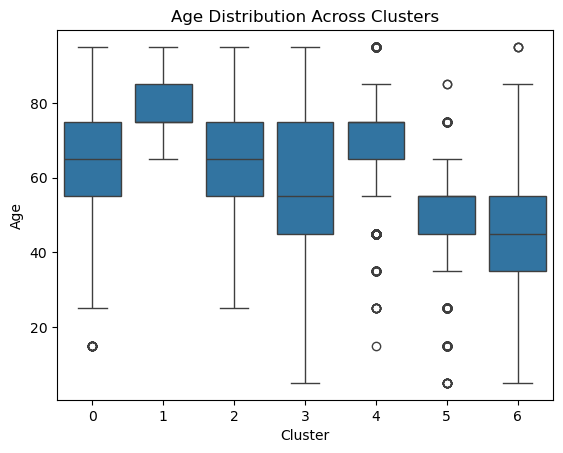

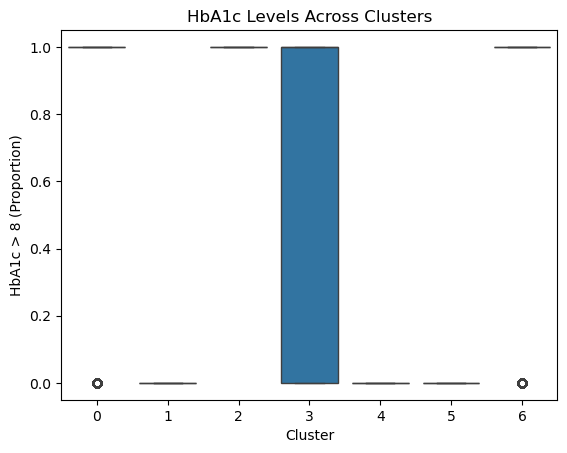

In [43]:
import seaborn as sns

# Plot distribution of age across clusters
sns.boxplot(x=clusters_7, y=data_selected["age"])
plt.title("Age Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()

# Plot distribution of HbA1c levels across clusters
sns.boxplot(x=clusters_7, y=data_selected["A1Cresult_>8"])
plt.title("HbA1c Levels Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("HbA1c > 8 (Proportion)")
plt.show()

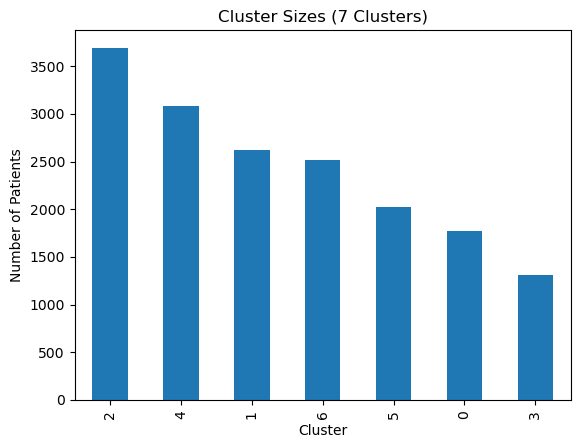

In [45]:
cluster_sizes = pd.Series(clusters_7).value_counts()
cluster_sizes.plot(kind="bar", title="Cluster Sizes (7 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Number of Patients")
plt.show()